In [70]:
#importing all necessary libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from PIL import ImageTk, Image
import PIL
import tkinter

In [72]:
#Edge Mapping Conversion

def MorphologyEX_Gradient(image):
    #blurs the image
    blur = cv2.GaussianBlur(image,(5,5),0)
    kernel = np.ones((5,5),np.uint8)
    #binarizes the image according to the threshold
    ret, thresh = cv2.threshold(blur, 190,255,cv2.THRESH_BINARY_INV)


    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    #increases the kernel size to remove any empty spaces within the lego brick
    kernel = np.ones((10,10),np.uint8)
    #removes any noise within the objects (dilation, erosion)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    #gradients (erosion - dilation)
    gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)
    
    return gradient;

def CannyEdge(image):
    ret, thresh = cv2.threshold(image, 90,255,cv2.THRESH_BINARY_INV) #converts to a binary image
    canny = cv2.Canny(thresh,10,70)
    return canny;

def Sobel(image):
    ret, thresh = cv2.threshold(image, 190,255,cv2.THRESH_BINARY_INV)
    sobelx = cv2.Sobel(thresh, cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(thresh, cv2.CV_8U,0,1,ksize=3)
    imgSobel = sobelx + sobely
    return imgSobel

In [73]:
#gets the image
path = 'C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/Eye.png'
#path = 'C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/round-circles.jpg' #basic test

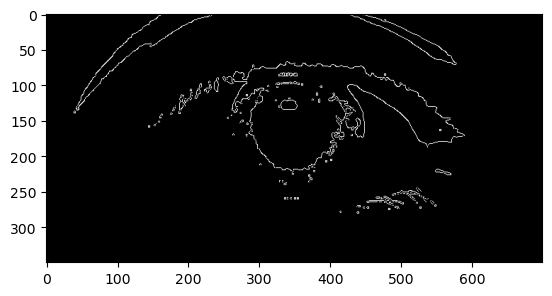

In [75]:

img = cv2.imread(path,1) #parameter refers to file name.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#converts to gray scale
binary = CannyEdge(gray)#gets the edge mapping
plt.imshow(binary,cmap='gray') #displays it


In [76]:
def HoughCircleTransformation(minRad, maxRad): #function with parameters to reset minimum and maximum radius
    global img;
    img = cv2.imread(path,1); #resets the image
    
    #hough transformations
    rows = binary.shape[0]
    circles = cv2.HoughCircles(binary, cv2.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30,minRadius=minRad,maxRadius=maxRad);
    
    #overlaps/draws the found circles on the eye(s)
    if circles is not None:
        print('Running')
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img, center, 5, (0, 0, 0), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, (0, 0, 0), 3)
    
    #converts to an apprioate colour flag and returns the image
    hc_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)     
    return hc_cv2     

Running


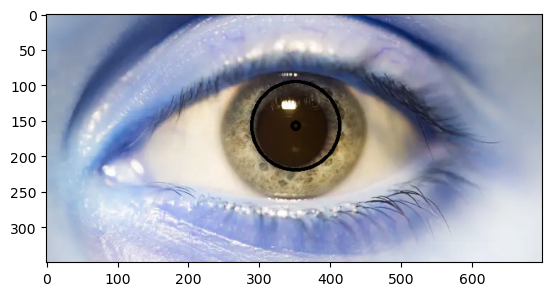

In [77]:
#TEST CODE
houghTransform = HoughCircleTransformation(50, 105);
img_plt = cv2.cvtColor(houghTransform, cv2.COLOR_BGR2RGBA)
plt.imshow(img_plt)

In [78]:
#GUI CODE

#sets up the window
window = Tk();
window.geometry("2500x1200");

#Image Conversion & Displays the initial image
imgPIL = PIL.Image.fromarray(houghTransform)
imgtkinter = ImageTk.PhotoImage(image = imgPIL)
label0 = tkinter.Label(image=imgtkinter)
label0.image = imgtkinter
label0.pack(anchor = tkinter.CENTER)


def sel0():
    global label0;
    
    #destroys the previous image label
    label0.destroy();
    
    selection1 = "Min = " + str(var1.get()) #gets the button values
    selection2 = "Max = " + str(var2.get())
    label1.config(text = selection1)            #sets to label text for visual aid
    label2.config(text = selection2)

    img_cv2 = HoughCircleTransformation(int(var1.get()), int(var2.get())); #calls the hough Transformation function

    imgPIL = PIL.Image.fromarray(img_cv2)                                  #converts the image
    imgtkinter = ImageTk.PhotoImage(image = imgPIL)
    
    label0 = tkinter.Label(image=imgtkinter)
    label0.image = imgtkinter                                              #packs the image and displays it

    label0.pack(anchor = tkinter.CENTER)
    #print("are you working")
    
    
var1 = DoubleVar()                                                         #Gets data type Double from the Buttons
var2 = DoubleVar()

scale1 = Scale( window, from_=0,to=300 ,variable = var1 )                  #Creates Slider1
scale1.pack(anchor=tkinter.E)

label1 = Label(window) #Creates Text Label1
label1.pack(anchor=tkinter.E)

scale2 = Scale( window, from_=0,to=300 ,variable = var2 )                  #Creates Slider2
scale2.pack(anchor=tkinter.E)

label2 = Label(window) #Creates Text Label2
label2.pack(anchor=tkinter.E)

button = Button(window, text="Set New Radius Distance", command=sel0)      #button to submit the new values
button.pack(anchor=tkinter.E)

window.mainloop();

Running
Running


In [ ]:
'''
FlowChart
1. Import Libraries
2. Gets the Raw Image
3. Grayscale it and Binarize it
4. Convert it to an Edge Map using Canny Edge Detection
5. Use Hough Transformation to Find all the Circles
6. Overlap and Draw the Circles
7. GUI - When Button is Pressed get the Slider values for distance and pass it to the Hough Transformation Function
8. Delete the Previous Image
9. Upload the New Image

'''